In [1]:
# pandasをインポートする。
import pandas as pd
from pandas import Series,DataFrame

# ファイルを読み込んで、DataFrameを作る。
titanic_df = pd.read_csv('train.csv')

In [2]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# データの概要。
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
# 警告を出さないようにします。
import warnings
warnings.filterwarnings('ignore')

データ分析を進めるためにいくつか具体的な問いを立てることにする。

    1.) タイタニック号の乗客はどのような人たちだったのか
    2.) それぞれの乗客はどのデッキにいたか？また、それは客室の種類とどのような関係にあったか？
    3.) 乗客は主にどこから来たのか？
    4.) 家族連れか、単身者か？
    
これらの問いの後に、さらに

    　5.) 沈没からの生還者には、どのような要因があったのか？
     
を調べていく。

まず、最初の問い

    　1.)タイタニック号の乗客はどのような人たちだったのか
     
に答えていく。

In [5]:
# 必要なモジュールをインポートする。
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

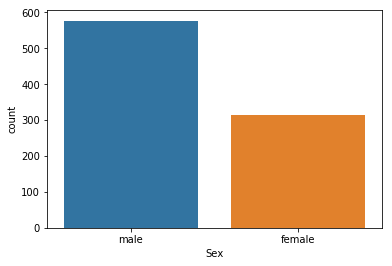

In [6]:
# まずは性別からチェック
sns.countplot('Sex',data=titanic_df)

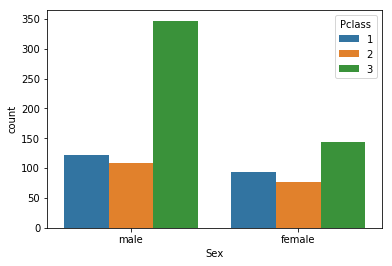

In [7]:
# 乗客の性別を客室で層別化してみる。
sns.countplot('Sex',data=titanic_df,hue='Pclass')

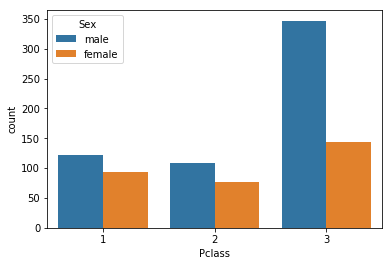

In [8]:
# 今度は逆に、乗客の客室を性別で層別化してみる。
sns.countplot('Pclass',data=titanic_df,hue='Sex')

上の2つをみると、3等客室は女性に比べて、男性が圧倒的に多いことがわかる。

16際未満の人たちを子供として、客層を詳しく調べていく。

In [9]:
# 16歳未満を子供とする。

def m_f_c(passenger):
    # 年齢と性別のデータを取得する。
    age, sex = passenger
    # 年齢を調べて16歳未満なら子供(child)、それ以外は性別を返す。
    if age < 16:
        return 'child'
    else:
        return sex
    
# Personという新しい列を追加する。
titanic_df['Person'] = titanic_df[['Age', 'Sex']].apply(m_f_c, axis=1)

In [10]:
# 最初の10行を確認してみる。
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


これで、男性(male)、女性(female)、子供(child)という列ができた。

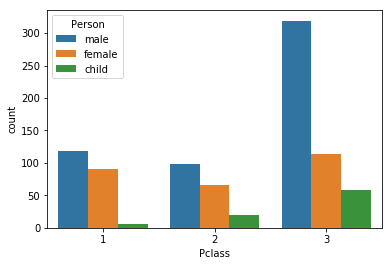

In [11]:
# 今作ったPerson列を使って、客室の種類別で人数を数える。
sns.countplot('Pclass',data=titanic_df, hue='Person')

上のデータを見ると、3等客室にはたくさんの子供がいたが、1等客室にはほとんどいなかったことがわかる。年齢に関する分布をもう少し詳しく見ていきたいと思う。

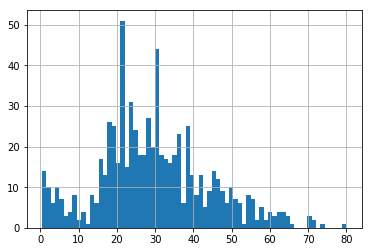

In [12]:
# 年齢のヒストグラム
titanic_df['Age'].hist(bins=70)

In [13]:
# 平均年齢
titanic_df['Age'].mean()

29.69911764705882

以下で、カーネル密度推定を使って、年齢と性別、人、客室の種類との関係を見ていく。

まず年齢と性別について

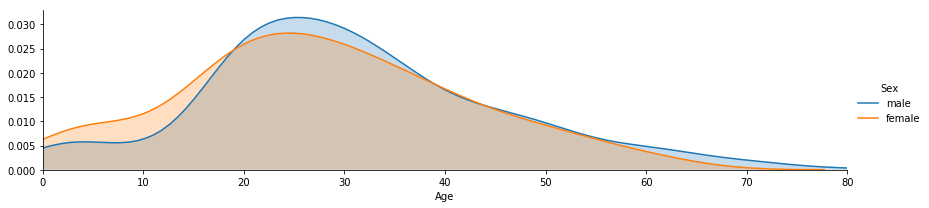

In [14]:
# FacetGridを使うと、複数のカーネル密度推定のグラフを1つのプロットに描くことができる。

# 性別で層別化して、グラフを少し横長に設定する。
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)

# mapを使って、性別ごとにkdeplotを描く。
fig.map(sns.kdeplot,'Age',shade= True)

# xの最大値を長老に合わせる。
oldest = titanic_df['Age'].max()

# x軸の範囲を設定する。
fig.set(xlim=(0,oldest))

# 凡例を付け加えておく。
fig.add_legend()

次に年齢と人について

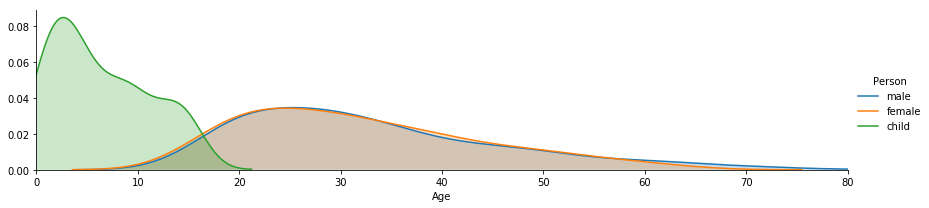

In [15]:
# Person列について同じ事をやれば、子供も含めたKDE plot が描ける。
fig = sns.FacetGrid(titanic_df, hue='Person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

今度は年齢と客室の種類について

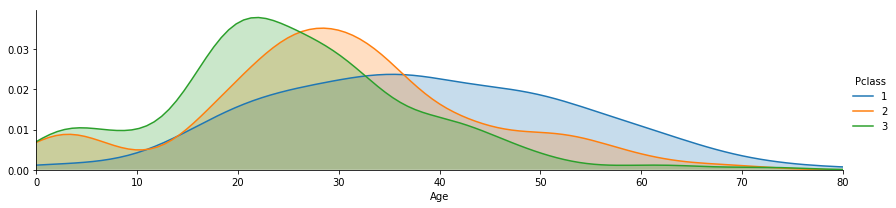

In [16]:
# 今度は、客室別に同じことをやってみる。
fig = sns.FacetGrid(titanic_df, hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

以上で、性別、年齢、客室の種類など、乗客の全体像がよくわかって来たと思う。よって、

次の問い

    2.) それぞれの乗客はどのデッキにいたか？また、それは客室の種類とどのような関係にあったか？
    
に答えていくことにする。

In [17]:
# 再び、データの概要。
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


Cabinという列が、それぞれの乗客が居た場所だが、NaN値があるので、まずこれを処理する。

生還者との関係を知るときに使うために、NaN値を x(エックス) で埋めることにする。

In [18]:
# NaNをxで埋めて、deckという新しいオブジェクトを作る。
deck = titanic_df['Cabin'].fillna('x')

In [19]:
# deckの概要。
deck.head()

0       x
1     C85
2       x
3    C123
4       x
Name: Cabin, dtype: object

実は、最初の1文字だけあれば、どこにいたのかがわかる。

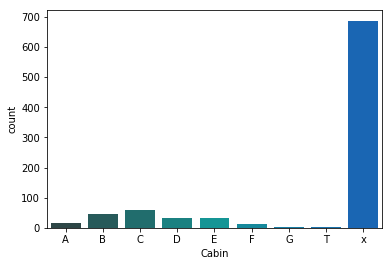

In [20]:
# シンプルに、for文で取り出してみる。

levels = []

# 1文字目を取り出す。
for level in deck:
    levels.append(level[0])    

# DataFrameを作って、プロットする。
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.countplot('Cabin',data=cabin_df,palette='winter_d',order=sorted(set(levels)))

Tだけ離れているので、おそらく間違ったデータであることがわかる。

ひとまず、デッキと客室の種類との関係をみるのと生還者との関係をみるために、titanic_dfのSurvived列とPclass列でできたcabin_df2という新しいDataFrameを作る。

In [21]:
# cabin_df2は辞書形式のDataFrame。
cabin_df2 = DataFrame({'Survived':titanic_df['Survived'], 'Pclass':titanic_df['Pclass']})

In [22]:
# cabin_df2の概要。
cabin_df2.head()

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0


次に、デッキと客室の種類との関係をみるのと生還者との関係をみるために、cabin_dfとcabin_df2を連結させる。

In [23]:
# pandasのconcatを使う。
cabin_df = pd.concat([cabin_df,cabin_df2], axis=1)

In [24]:
# cabin_dfの概要。
cabin_df.head()

,Cabin,Pclass,Survived
0,x,3,0
1,C,1,1
2,x,3,1
3,C,1,1
4,x,3,0


ここでTとxを取り除いた新しいDataFrameを作り、プロットしてみる。

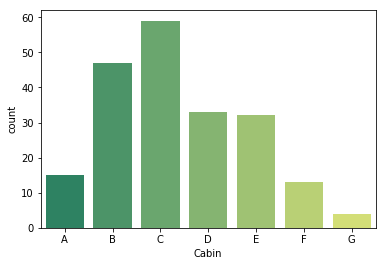

In [25]:
# Tとx以外のデータだけから新しくDataFrameを作る。
cabin_df = cabin_df[(cabin_df.Cabin != 'T') & (cabin_df.Cabin != 'x')]
sns.countplot('Cabin',data=cabin_df,palette='summer',
                          order=sorted(set(cabin_df['Cabin'])))

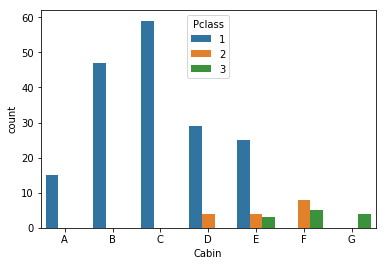

In [26]:
# 乗客がいたデッキと客室の種類とどのような関係にあったかを見てみる。
sns.countplot('Cabin', data=cabin_df, hue='Pclass', order=['A','B','C','D','E','F','G'])

以上で、乗客が居た場所ごとの解析ができた。引き続き、

次の問い

    3.) 乗客は主にどこから来たのか？
    
に答えていくことにする。

In [27]:
# 再び、データの概要。
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


乗船した場所を示す「Embarked」列には、C,Q,S という値が入っている。 Kaggleのページを参照すると、それぞれCherbourg, Queenstown, Southhamptonだということがわかる。

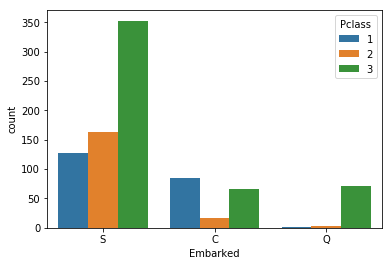

In [28]:
# 乗船した場所を客室で層別化してみる。
sns.countplot('Embarked',data=titanic_df,hue='Pclass')

In [29]:
# 実はNaNがある。
from collections import Counter
Counter(titanic_df.Embarked)

Counter({'C': 168, 'Q': 77, 'S': 644, nan: 2})

Queenstownからの乗客のほとんどが、3等客室であることがわかる。これは、当時のこの地域の経済が余り良くなかった事を反映しているのかもしれない。

それでは、4つめの質問に進む。

    4.) 家族連れか？単身者か？

In [30]:
# 再び、データの概要。
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


家族連れか単身者かをみるために単身者かどうかを示す新しい列を追加する。

In [31]:
# 親子、兄弟姉妹を示す列を足し合わせる。
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

Alone列が0でなければ、その乗客は誰かと一緒に乗船したことがわかる。 1人（Alone）と家族連れと（With Family）に分けてみる。

In [32]:
# 数字を、文字列に変換する。
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

In [33]:
# 確認しておく。
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


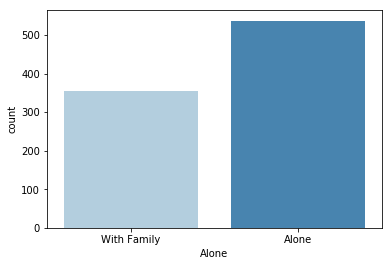

In [34]:
# 数を描画してみる。
sns.countplot('Alone',data=titanic_df,palette='Blues')

それでは、最後の問い

    5.) 沈没からの生還者には、どのような要因があったのか？
    
に答えていくことにしよう。

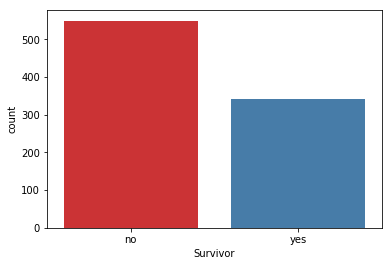

In [35]:
# 生存者を表す「Survivor」という新しい列を作ります。
# 生きていたら「yes」、犠牲になっていたら「no」を値とします。
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})
# プロットします。
sns.countplot('Survivor',data=titanic_df,palette='Set1')

かなり多くの人々が犠牲になっているのがわかる。客室の種類は関係あるのだろうか？映画Titanicで言われているように、3等客室の乗客への扱いが不当に悪かったかどうかを見てみる。

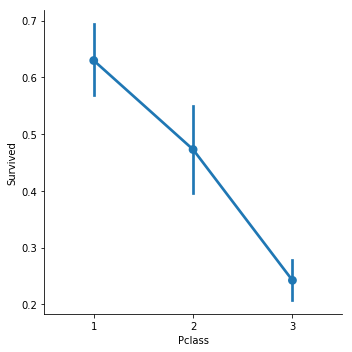

In [36]:
# こういった解析には、catplotを用います。
sns.catplot('Pclass', 'Survived',data=titanic_df, order=[1, 2, 3], kind='point')

3等客室の乗客の生存率はかなり低いことがわかる。ただし、これは3等客室に男性が多い、つまり、「女性と子供を先に」というポリシーの犠牲になったのかもしれない。これを調べるために、もう少し詳しく見ていこう。

性別を考慮して、生存率をみてみる。

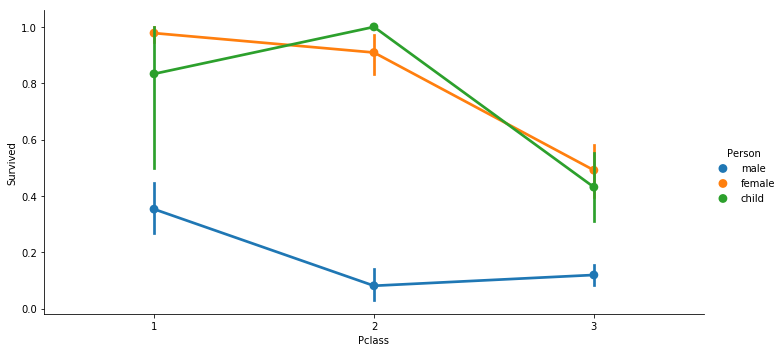

In [37]:
# 性別を考慮して、catplotを描きます。
sns.catplot('Pclass','Survived',hue='Person',data=titanic_df, 
                    order=[1,2,3], aspect=2, kind='point')

3等客室の乗客の生存率は、やはり悪いことがわかる。また、男性であるということは、生存率を著しく下げることも見て取れる。2等客室の乗客に関しては、「女性と子供を先に」というポリシーが実践されていたようだ。

それでは、年齢と生存率との関係はどうだろうか？

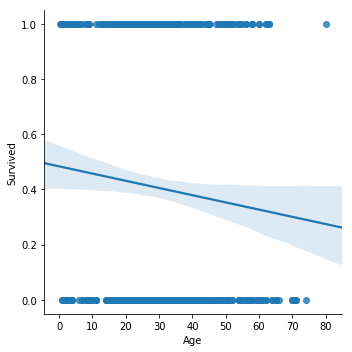

In [38]:
# 年齢と生存率のグラフを描いてみる。
sns.lmplot('Age','Survived',data=titanic_df)

年齢が上がるに連れて生存率が下がっているのがわかる。ここに、客室の情報を加えてみる。

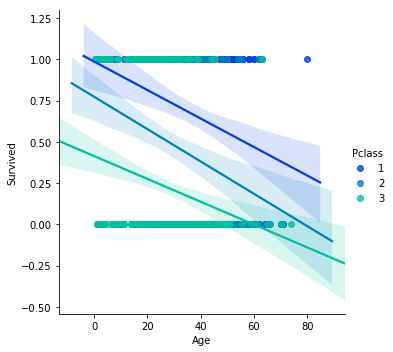

In [39]:
# 客室の種類で層別化する。
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,
                   palette='winter', hue_order=[1,2,3])

x_binsを使って、少し見やすくしてみる。

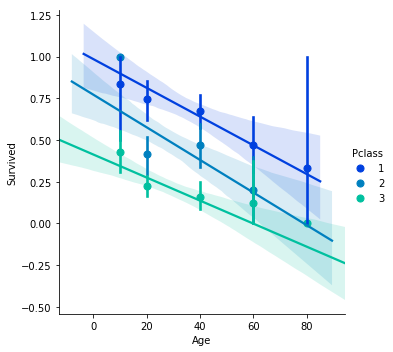

In [40]:
# ポイントを決めて、標準偏差を追記できる。
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,
                   palette='winter',x_bins=generations,hue_order=[1,2,3])

80歳のところを見てわかるように、1等客室に、歳をとった偉い人が居た可能性がある。 

性別と年齢の関係も見てみよう。

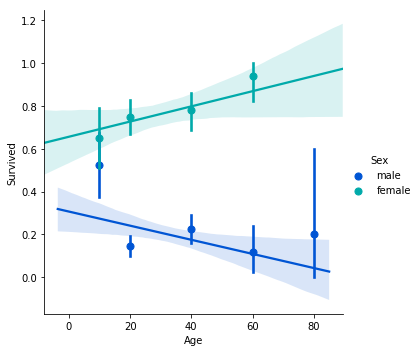

In [41]:
# 性別で層別化する。
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,
                   palette='winter',x_bins=generations)

性別、年齢、客室の等級が、生存率にどう影響するのかデータを可視化することができた。

次に、乗客がいたデッキと生存率との関係を見てみよう。

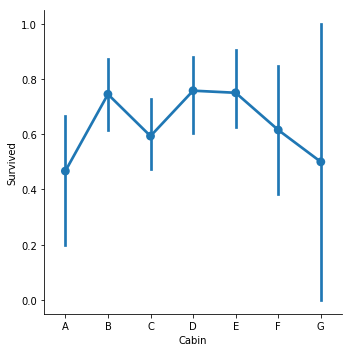

In [42]:
# ここでもcatplotを用いる。
sns.catplot('Cabin', 'Survived', data=cabin_df,order=list('ABCDEFG'), kind='point')

Aから順に下へ深くなって行くので、EFGと下へ行くほど生存率が下がるように見えるのは、直感と合うかもしれない。一方、Aの生存率が低いのは、氷河に衝突した衝撃ですでに犠牲者が出ていたのかもしれない。

注意すべき点としては、AやGにいた人は人数が少ないので、誤差が大きくなっていること。データとして信頼できるかどうか微妙。

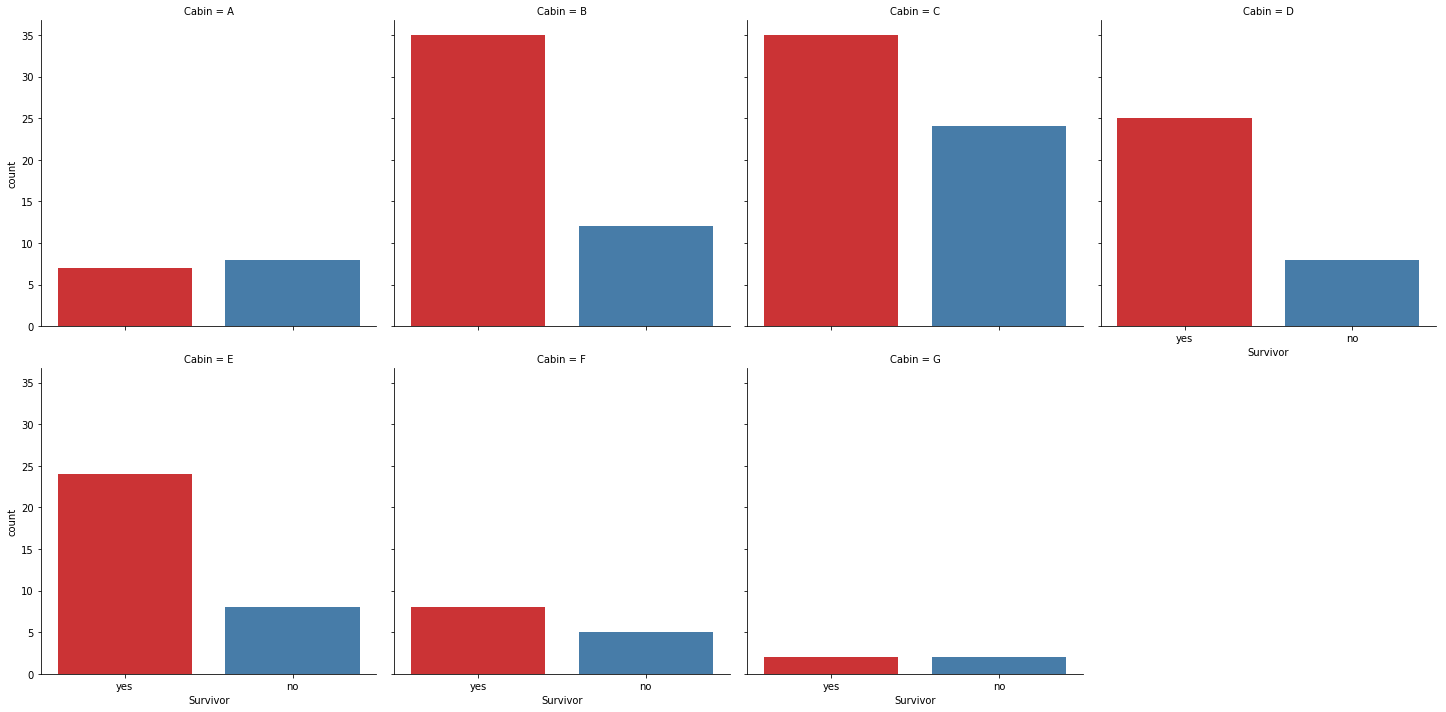

In [43]:
# cabin_dfにSurvivor列を追加する。
cabin_df["Survivor"] = cabin_df.Survived.map({0: "no", 1: "yes"})
# catplotでそれぞれのデッキでの生存者と犠牲者の数をプロットしてみる。
sns.catplot('Survivor',col="Cabin",data=cabin_df,palette='Set1', col_wrap=4,
                   col_order = list('ABCDEFG'), kind='count',aspect=1)

最後に、家族連れであることが事故からの生存率をあげているのかを見てみる。

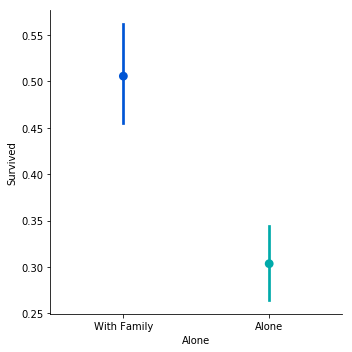

In [44]:
# ここでもcatplotを用いる。
sns.catplot('Alone', 'Survived', data=titanic_df, palette='winter', kind='point')

家族連れであることは生存率を引き上げていることがわかった。客室で層別化して見てみよう。

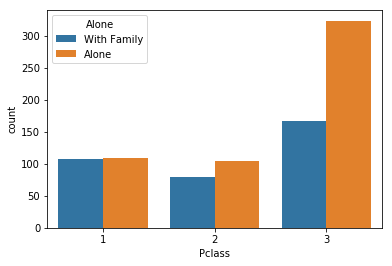

In [45]:
sns.countplot('Pclass', data=titanic_df, hue='Alone')

3等客室は家族連れが少ないことがわかった。3等客室の生存率が悪かったことから、やはり家族連れであることは生存率を引き上げている要因となっていることがわかった。

以上でタイタニック号のデータ解析を終わりにします。